# Principle Component Analysis (PCA)

 Recall that  a data matrix $X$ consists of $N$ rows and $d$ columns (i.e. each of the $N$ rows is an example, where each example contains $d$ features: $x^{(i)} \in \mathbb{R}^d$.)
 
 $$ X=\left[\begin{matrix}
x^{(1)}_1 & x^{(1)}_2& \cdots & x^{(1)}_d\\
x^{(2)}_1 & x^{(2)}_2& \cdots & x^{(2)}_d\\
\vdots & \vdots & \cdots & \vdots \\
x^{(N)}_1 & x^{(N)}_2& \cdots & x^{(N)}_d\\
 \end{matrix}\right]$$ 
 
 PCA asks the question, "How can we *best* represent the information in $X$ in a lower dimensional subspace?"$\:$ In other words, how can we find $k<d$ (new) features that *best* caputures the information in the orginal data by keeping as much variability in the dataset. (The features should be uncorrelated to provide variablity not given by the other features.)

We start by centering the data.  Then we find the best $k$ new uncorrelated features $v_1 v_2 ... v_k$ that maximize the variance.  These new features are called the top $k$ *principle components* of $X$.

The intuition behind the above objective function can be visualized with the following 2D data points $x^{(i)}$ in $R^2$. Each of the three lines in the illustration maintains a different amount of variance.

<img src="images/max var and points.png" height="200" width="600">

---
In the first part of this  notebook, we show you how to extract the principle components ( ${\bf v}^{(1)}, {\bf v}^{(2)}, ..., {\bf v}^{(k)}$ ) from a data matrix, $X$, using
 **Singular Value Decomposition (SVD)** of $X$

---

Let's first import the necessary packages

In [94]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

The following toy example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="images/data_matrix.png" height="300" width="300" align='center'>

- Each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?

Time for some PCA...



## Step 1:  Getting, understanding, and preprocessing the dataset


In [95]:
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

num_users = 7
num_movies = 5

Normally we wouldn't know that the movie ratings are based on **sci-fi** or **romance**.  But since we know the structure, we can plot the points  to see the structure we want PCA to uncover.

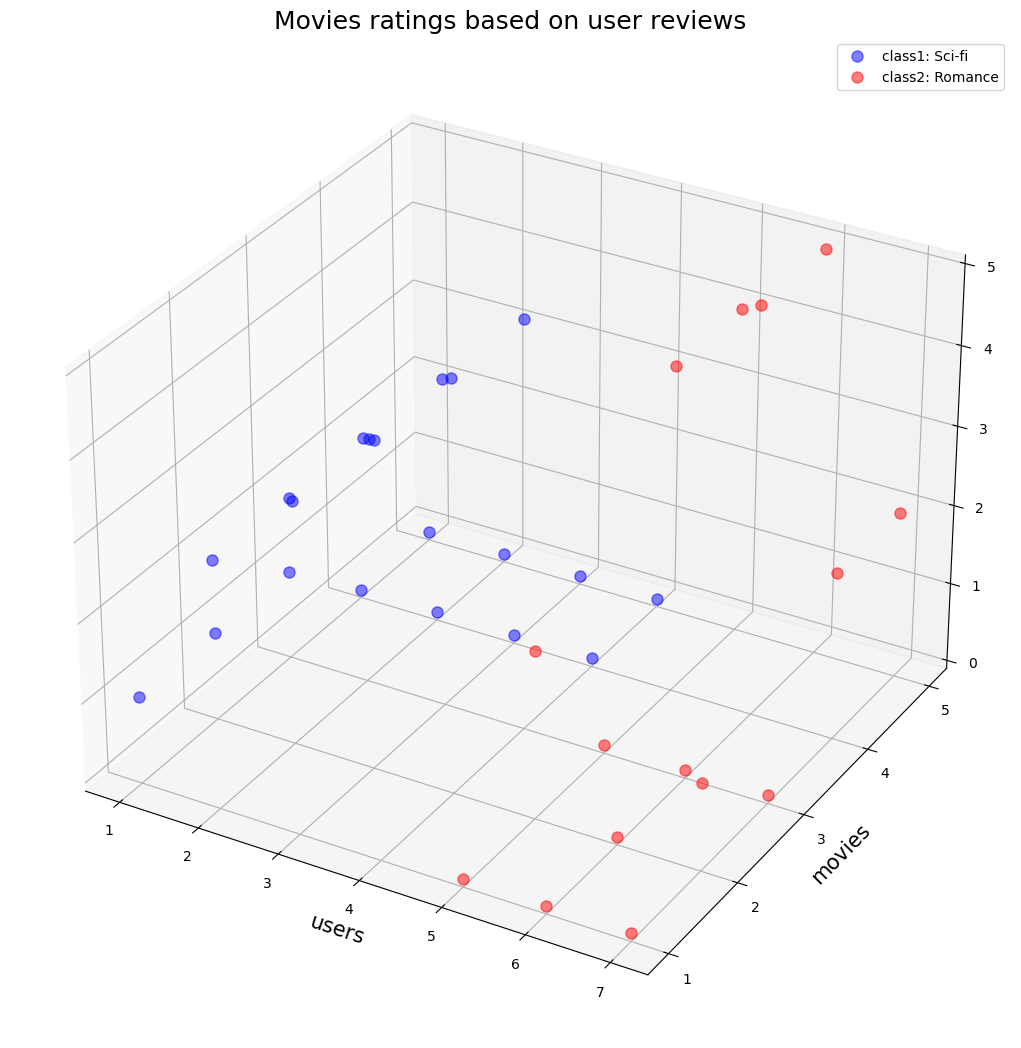

In [96]:
users = np.array( [[i]*num_movies for i in range(1, num_users+1) ]).flatten()
movie = np.array( [[i] for i in range(1, num_movies+1)]*num_users ).flatten()
reviews = X.flatten()

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   

ax.plot(users[:20], movie[:20], reviews[:20], 'o', markersize=8, color='blue',  alpha=0.5, label='class1: Sci-fi')
ax.plot(users[20:], movie[20:], reviews[20:], 'o', markersize=8, color='red',   alpha=0.5, label='class2: Romance')

plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7])
plt.yticks(ticks=[1, 2, 3, 4, 5])
plt.title('Movies ratings based on user reviews', fontsize=18)
plt.xlabel("users", fontsize=15)
plt.ylabel("movies", fontsize=15)
ax.legend(loc='upper right')

plt.show()


### Preprocessing step need for PCA: centering the dataset

    Read the documentation for np.linalg.svd. Then make sure you can follow the code below:

In [97]:
Xmean = X.mean(axis=0)
X_centered = X-Xmean
print(np.around(X_centered, decimals=2), sep="\n", end="\n\n")
A = X_centered.T.dot(X_centered)
print("A=",np.around(A, decimals=2), sep="\n", end="\n\n")
I_d = np.eye(5)
u_A, d_A, vT_A = np.linalg.svd(A)
v= np.array([u_A[:,0]]).reshape(5,1)
print("v= ",v, sep="\n", end="\n\n")
D_A = d_A*I_d
print("D_A= ", np.around(D_A, decimals=2 ), sep="\n", end="\n\n")
print("U_A.shape, D_A.shape, V_A.T.shape ->", u_A.shape, d_A.shape, vT_A.shape, end="\n\n")

print("U_A =",np.around(u_A, decimals=2), sep="\n", end="\n\n")

print("D_A =",np.around(d_A, decimals=2), sep="\n", end="\n\n")

print("V_A.T =",np.around(vT_A, decimals=2), sep="\n", end="\n\n")

print("V_A.T *  U_A =",np.around(vT_A.dot(u_A), decimals=3), sep="\n", end="\n\n") #U=V
print("UDVT", np.around(u_A.dot(D_A).dot(vT_A), decimals=2), sep="\n", end="\n\n")

print("V_A.T*v", np.around(vT_A.dot(v), decimals=2), sep="\n", end="\n\n")

vtest=np.around(u_A[:,0], decimals=2)
print(vtest)
print(vtest.T.dot(vtest))

[[-0.86 -1.29 -0.86 -1.57 -1.57]
 [ 1.14  0.71  1.14 -1.57 -1.57]
 [ 2.14  1.71  2.14 -1.57 -1.57]
 [ 3.14  2.71  3.14 -1.57 -1.57]
 [-1.86 -0.29 -1.86  2.43  2.43]
 [-1.86 -2.29 -1.86  3.43  3.43]
 [-1.86 -1.29 -1.86  0.43  0.43]]

A=
[[ 26.86  21.29  26.86 -20.43 -20.43]
 [ 21.29  19.43  21.29 -15.14 -15.14]
 [ 26.86  21.29  26.86 -20.43 -20.43]
 [-20.43 -15.14 -20.43  27.71  27.71]
 [-20.43 -15.14 -20.43  27.71  27.71]]

v= 
[[-0.47149619]
 [-0.37369115]
 [-0.47149619]
 [ 0.45592631]
 [ 0.45592631]]

D_A= 
[[110.09   0.     0.     0.     0.  ]
 [  0.    16.73   0.     0.     0.  ]
 [  0.     0.     1.75   0.     0.  ]
 [  0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.  ]]

U_A.shape, D_A.shape, V_A.T.shape -> (5, 5) (5,) (5, 5)

U_A =
[[-0.47 -0.36 -0.39 -0.71  0.  ]
 [-0.37 -0.41  0.83 -0.    0.  ]
 [-0.47 -0.36 -0.39  0.71  0.  ]
 [ 0.46 -0.54 -0.06  0.   -0.71]
 [ 0.46 -0.54 -0.06  0.    0.71]]

D_A =
[110.09  16.73   1.75   0.     0.  ]

V_A.T =
[[-0.47 -0.

---
## Step 2. Implementing PCA using Singular Value Decomposition (SVD)


From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

<img src="images/SVD.png" height="500" width="500">

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting ${\bf v}^{(1)}, {\bf v}^{(2)}, ..., {\bf v}^{(k)}$ vectors.

In [98]:
u, s, vT = np.linalg.svd(X_centered) #note that s contains only the diagonal elements

print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691 -0.158 -0.535 -0.263 -0.272 -0.259]
 [ 0.265 -0.142 -0.077  0.302  0.223 -0.775  0.403]
 [ 0.39   0.133 -0.036  0.211 -0.876  0.01   0.129]
 [ 0.516  0.408  0.004 -0.7    0.157 -0.007  0.23 ]
 [-0.388  0.286  0.686 -0.195 -0.225 -0.446 -0.101]
 [-0.546  0.347 -0.662 -0.176 -0.178 -0.199  0.201]
 [-0.25  -0.34   0.244 -0.137 -0.084  0.294  0.806]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [-0.389  0.831 -0.389 -0.061 -0.061]
 [-0.    -0.     0.     0.707 -0.707]
 [-0.707 -0.     0.707  0.     0.   ]]



### Selecting the right number $k$ of principal components

The best way to select $k$ is by cross validation. 

However, we can  calculate how much of the variance of the original dataset was maintainded after projecting to $k$ dimensions.


Remember  $X^TX$ can be factorized into $X^TX=VDV^T$ where 
$D=\left[\begin{matrix}
\lambda_1&0&\cdots & 0 \\
0&\lambda_2&\cdots & 0 \\
\vdots & \vdots & & \vdots \\
0&0&\cdots &\lambda_d
\end{matrix}\right]$

The amount of variance we maintain by selelcting the top $k$ princple components is $\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^d\lambda_i}$


Let's plot the singlar values for the $D$ matrix.

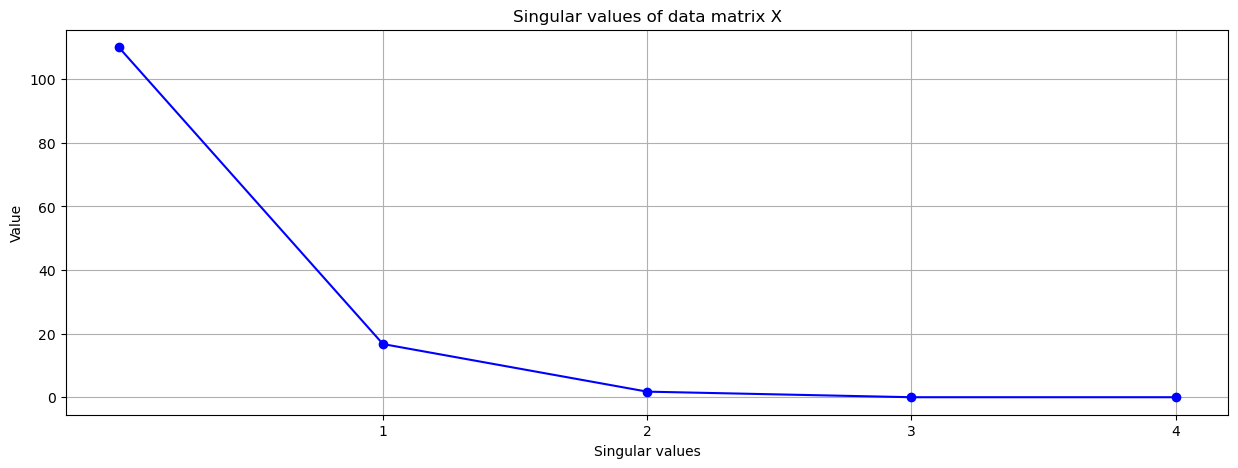

In [99]:
d = s*s
plt.figure(figsize=(15, 5))
plt.plot(d, 'bo-')
plt.ylabel("Value")
plt.xlabel("Singular values")
plt.title("Singular values of data matrix X")
plt.xticks([i+1 for i in range(len(d)-1)])
plt.grid()

Notice, that values that follow the first two singular values diminish to zero. <br>

Hence, we may be able to represent our data matrix fairly well with just the first to principal components.

---

### Obtaining our compressed data representation : $X_{PCA}$

In [100]:
X_pca = np.matmul(X, np.transpose(vT[:2, :]))

print(np.around(X_pca, decimals=3))

[[ 1.317  1.124]
 [ 3.95   3.372]
 [ 5.267  4.496]
 [ 6.583  5.62 ]
 [-2.9    5.121]
 [-4.559  5.37 ]
 [-1.45   2.56 ]]


Lets visualize what just happened.

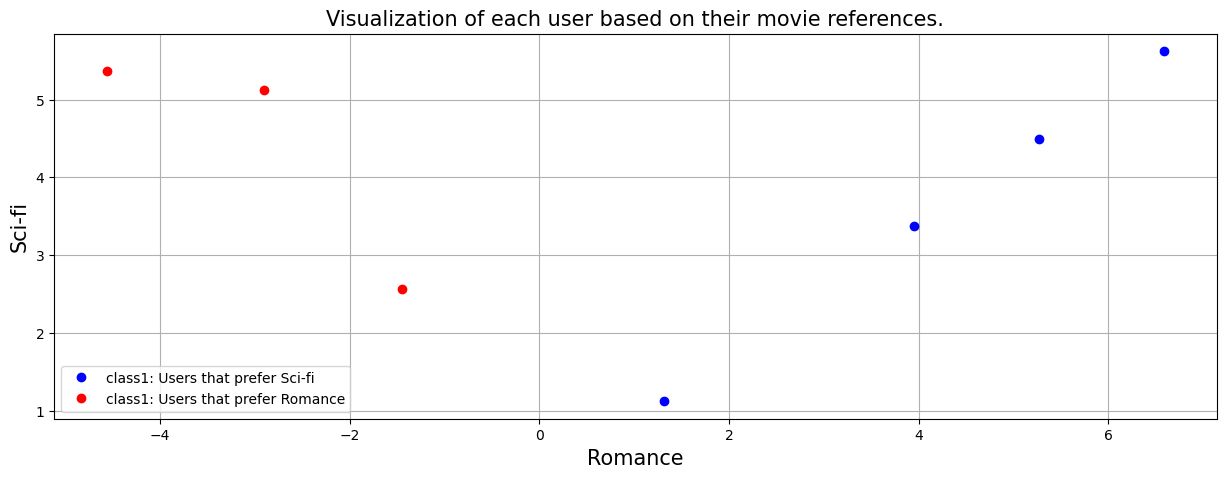

In [101]:
plt.figure(figsize=(15,5))
plt.title("Visualization of each user based on their movie references.", fontsize=15)
plt.plot(X_pca[:4,0], X_pca[:4,1], 'bo', label='class1: Users that prefer Sci-fi')
plt.plot(X_pca[4:,0], X_pca[4:,1], 'ro', label='class1: Users that prefer Romance')
plt.ylabel('Sci-fi', fontsize=15)
plt.xlabel('Romance', fontsize=15)
plt.legend(loc='lower left')
plt.grid()

And there we have it. <br>

- The data has been projected into $2D$ space wherein each of the users have been positioned in space based on their movie preferences. 
- Each of the dimensions now capture the degree to a user prefers Sci-fi or Romance.

- The compressed data representation of $X$ is now $X_{PCA}$. 
- $X_{PCA}$ can now be used to do further machine learning, such as clustering, binary classification, and so on.

---
## Homework

The code below loads a dataset containing images of faces
and displays some of them. 

Each image is a 62x47 pixel array.
The images are read into a matrix called fea.
The rows of the matrix fea are the images (examples).
The features (columns) are the pixels.
Each example is represented by a vector of real numbers of length 2914,
listing the pixels from left to right, row by row, from top to bottom.




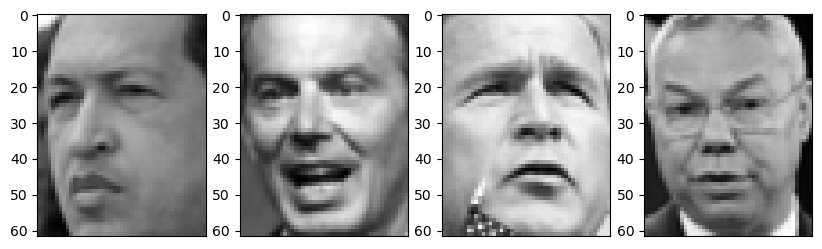

In [102]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w = lfw_people.images.shape
npix = h*w
fea = lfw_people.data

def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,20))
nplt = 4
for i in range(nplt):    
    plt.subplot(1,nplt,i+1)
    plt_face(fea[i])

plt.show()



You can display the face corresponding to Example t in the dataset
by executing the following commands:


plt_face(fea[t])

plt.show()

The 4th face is:


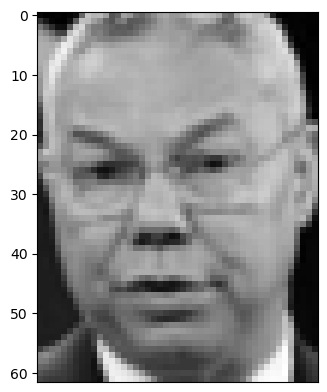

The mean face is:


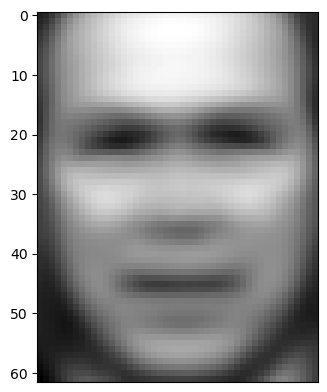

In [171]:
# Write your code here

#a)Displaying the 4th face
print('The 4th face is:')
plt_face(fea[3])
plt.show()

#b)Calculating the mean
m=[]

for i in range(len(fea[0])):
    sum=0
    for j in range(len(fea)):
        sum+=fea[j][i]

    sum=sum/len(fea)
    

    m.append(sum)


mnn=np.array(m)#mean numpy array

print('The mean face is:')
plt_face(mnn)
plt.show()







      
    

        




In [135]:
#c dimensionality reduction using pca

x_f=np.copy(fea)

for i in range(len(x_f)):
    x_f[i]=x_f[i]-mnn









In [173]:
#computing svd using 0 centered matrix

uo ,so,vTo=np.linalg.svd(x_f)

print(uo.shape)
print(so.shape)
print(vTo.shape)

# the first five principal components are
print('The first 5 principal components are:')
print(vTo[0])
print(vTo[1])
print(vTo[2])
print(vTo[3])
print(vTo[4])


(1288, 1288)
(1288,)
(2914, 2914)
The first 5 principal components are:
[-0.00750877 -0.00812394 -0.00893856 ... -0.01415705 -0.01228611
 -0.01032105]
[-0.01736775 -0.01625778 -0.01584153 ...  0.03365867  0.03306131
  0.03161871]
[-0.02008713 -0.01817848 -0.01725674 ... -0.03870662 -0.03452758
 -0.03226309]
[-0.03030667 -0.03257753 -0.03441757 ... -0.0316022  -0.02888925
 -0.02280478]
[-0.00905503 -0.00954557 -0.01001607 ...  0.09149976  0.0837678
  0.0732807 ]


In [139]:
#projecting 4th face on first 5 principal components
z=np.matmul(fea,np.transpose(vTo[:5,:]))



print("4th example of the transformed space is:")
print(z[3])







4th example of the transformed space is:
[-26.476265    -0.21333511   0.6133984   -3.9465241   -2.1089778 ]


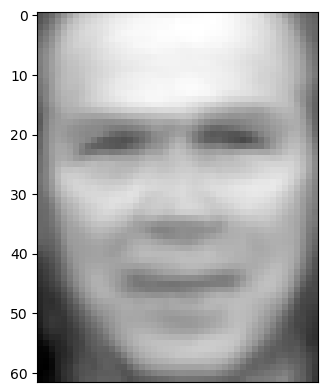

In [174]:
#e) projecting 4th face back into original space and adding the mean and displaying the result


x_recontruct=np.matmul(z,vTo[:5,:])

x_recontruct[3]=x_recontruct[3]+mnn

plt_face(x_recontruct[3])
plt.show()


4th example of the transformed space with 50 components is:
[-2.6476276e+01 -2.1333469e-01  6.1339819e-01 -3.9465244e+00
 -2.1089764e+00 -2.4980214e+00  3.8039312e-02 -1.4176545e-01
  1.2046551e+00  7.0468920e-01  2.5112343e+00 -1.9035015e-01
 -1.4229816e+00 -3.0752401e+00  1.1633451e+00  8.6084068e-01
  1.3927447e+00  1.8085296e+00 -2.3960130e+00 -1.7770563e+00
 -2.1627477e-01  1.3257527e+00  1.0007342e+00 -1.8508377e+00
 -1.5958631e-01  1.2290657e+00  7.8841245e-01 -4.3232056e-01
  1.9695312e-02  3.2944381e-01  2.2808400e-01  3.0039865e-01
 -1.0757110e+00  9.2190969e-01  5.5211699e-01 -6.3961154e-01
 -4.2833000e-01  5.2407610e-01 -3.7585750e-01 -2.7910972e-01
  6.4414650e-01  6.9183528e-01  4.5045912e-02 -1.4237900e-01
  1.3173427e-01 -8.0005825e-02 -7.5243330e-01 -2.6632193e-01
 -3.1432670e-01 -8.1471235e-01]


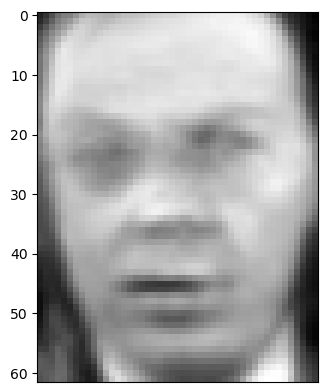

4th example of the transformed space with 300 components is:
[-2.64762764e+01 -2.13334695e-01  6.13398194e-01 -3.94652438e+00
 -2.10897636e+00 -2.49802136e+00  3.80393118e-02 -1.41765445e-01
  1.20465505e+00  7.04689205e-01  2.51123428e+00 -1.90350145e-01
 -1.42298162e+00 -3.07524014e+00  1.16334510e+00  8.60840678e-01
  1.39274466e+00  1.80852962e+00 -2.39601302e+00 -1.77705634e+00
 -2.16274768e-01  1.32575274e+00  1.00073421e+00 -1.85083771e+00
 -1.59586310e-01  1.22906566e+00  7.88412452e-01 -4.32320565e-01
  1.96953118e-02  3.29443812e-01  2.28083998e-01  3.00398648e-01
 -1.07571101e+00  9.21909690e-01  5.52116990e-01 -6.39611542e-01
 -4.28330004e-01  5.24076104e-01 -3.75857502e-01 -2.79109716e-01
  6.44146502e-01  6.91835284e-01  4.50459123e-02 -1.42379001e-01
  1.31734267e-01 -8.00058246e-02 -7.52433300e-01 -2.66321927e-01
 -3.14326704e-01 -8.14712763e-01  3.20010781e-01  7.72027791e-01
 -6.89426959e-01 -2.01990306e-01  1.63204089e-01  8.56359720e-01
  3.04057300e-01  1.14011431e

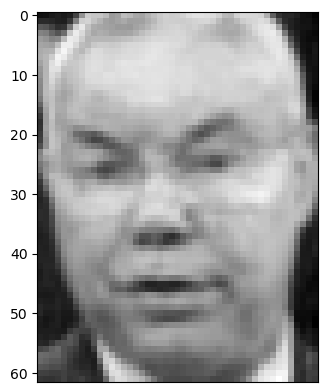

4th example of the transformed space with 500 components  is:
[-2.64762764e+01 -2.13334695e-01  6.13398194e-01 -3.94652438e+00
 -2.10897636e+00 -2.49802136e+00  3.80393118e-02 -1.41765445e-01
  1.20465505e+00  7.04689205e-01  2.51123428e+00 -1.90350145e-01
 -1.42298162e+00 -3.07524014e+00  1.16334510e+00  8.60840678e-01
  1.39274466e+00  1.80852962e+00 -2.39601302e+00 -1.77705634e+00
 -2.16274768e-01  1.32575274e+00  1.00073421e+00 -1.85083771e+00
 -1.59586310e-01  1.22906566e+00  7.88412452e-01 -4.32320565e-01
  1.96953118e-02  3.29443812e-01  2.28083998e-01  3.00398648e-01
 -1.07571101e+00  9.21909690e-01  5.52116990e-01 -6.39611542e-01
 -4.28330004e-01  5.24076104e-01 -3.75857502e-01 -2.79109716e-01
  6.44146502e-01  6.91835284e-01  4.50459123e-02 -1.42379001e-01
  1.31734267e-01 -8.00058246e-02 -7.52433300e-01 -2.66321927e-01
 -3.14326704e-01 -8.14712763e-01  3.20010781e-01  7.72027791e-01
 -6.89426959e-01 -2.01990306e-01  1.63204089e-01  8.56359720e-01
  3.04057300e-01  1.14011431

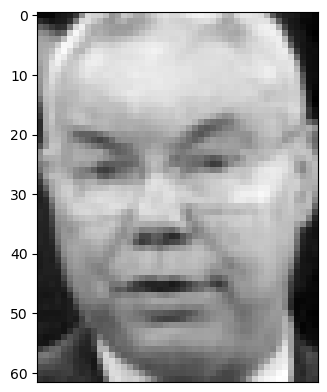

In [175]:
#Repeating with first 50 components instead of 5
z1=np.matmul(fea,np.transpose(vTo[:50,:]))



print("4th example of the transformed space with 50 components is:")
print(z1[3])
x_recontruct1=np.matmul(z1,vTo[:50,:])

x_recontruct1[3]=x_recontruct1[3]+mnn

plt_face(x_recontruct1[3])
plt.show()


#Repeating with first 300 components instead of 50
z1=np.matmul(fea,np.transpose(vTo[:300,:]))



print("4th example of the transformed space with 300 components is:")
print(z1[3])
x_recontruct1=np.matmul(z1,vTo[:300,:])

x_recontruct1[3]=x_recontruct1[3]+mnn

plt_face(x_recontruct1[3])
plt.show()



#Repeating with first 500 components instead of 300
z1=np.matmul(fea,np.transpose(vTo[:500,:]))



print("4th example of the transformed space with 500 components  is:")
print(z1[3])
x_recontruct1=np.matmul(z1,vTo[:500,:])

x_recontruct1[3]=x_recontruct1[3]+mnn

plt_face(x_recontruct1[3])
plt.show()




In [170]:
#Variance maintained after projecting on first 5 and first 50 components are the following

do=so*so

sso=0
for i in do:
    sso+=i

ab1=0
ab2=0

for i in range(4):
    ab1=ab1+do[i]

for i in range(50):
    ab2=ab2+do[i]

print("The amount of variance maintained by projecting of the top 5 principle components is:",(ab1/sso)*100,' percent')
print("The amount of variance maintained by projecting of the top 50 principle components is:",(ab2/sso)*100,' percent')

    

The amount of variance maintained by projecting of the top 5 principle components is: 46.548777475593084  percent
The amount of variance maintained by projecting of the top 50 principle components is: 83.49233157790728  percent
